In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer



In [2]:
# Load your data from Excel
data = pd.read_excel(r'C:\Users\avtha\Desktop\University\Semester 4\Master thesis\Data\finalized_data.xlsx')



In [70]:

feedbacks = data['stop_feedback'].tolist()

tfidf_vectorizer = TfidfVectorizer(max_df=0.5, min_df=2, use_idf=True)

tfidf_matrix = tfidf_vectorizer.fit_transform(feedbacks)

#Dimensionality reduction using Truncated SVD
svd = TruncatedSVD(n_components=100)
normalizer = Normalizer(copy=False)
lsa = make_pipeline(svd, normalizer)
X = lsa.fit_transform(tfidf_matrix)

#Perform KMeans clustering for a range of K values
k_values = range(1, 30)
inertia_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

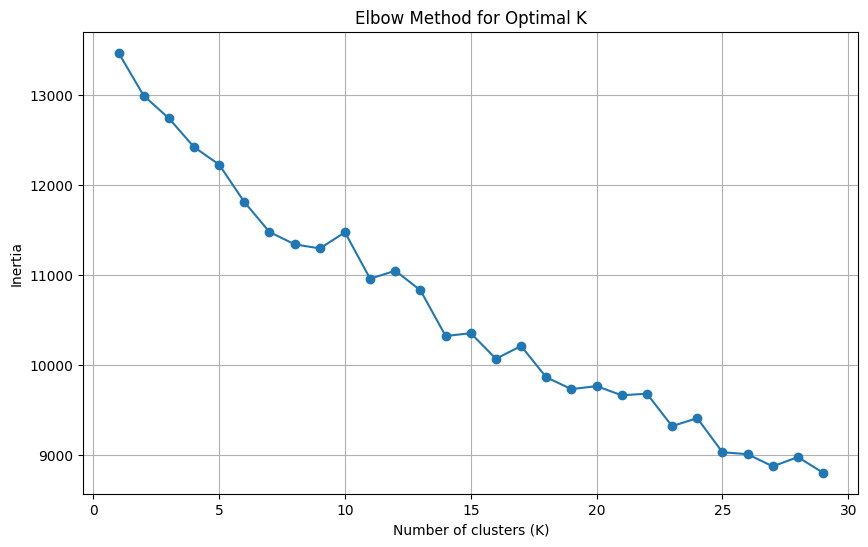

In [71]:
#Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia_values, marker='o', linestyle='-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()